In [ ]:
MA = [[0,3,4,5,6,4.5,5.5,6.5,7.5,5,6,7,8,6.7,7.7,8.7,9.7,12.7],
         [3,0,1,2,3,2,3,4,5,4,5,6,7,6,7,8,9,9.7],
         [4,1,0,1,2,3,4,5,4,5,6,7,6,7,8,9,8,8.7],
         [5,2,1,0,1,4,5,4,3,6,7,6,5,8,9,8,7,7.7],
         [6,3,2,1,0,5,4,3,2,7,6,5,4,9,8,7,6,6.7],
         [4.5,2,3,4,5,0,1,2,3,2,3,4,5,4,5,6,7,8],
         [5.5,3,4,5,4,1,0,1,2,3,4,5,4,5,6,7,6,7],
         [6.5,4,5,4,3,2,1,0,1,4,5,4,3,6,7,6,5,6],
         [7.5,5,4,3,2,3,2,1,0,5,4,3,2,7,6,5,4,5],
         [5,4,5,6,7,2,3,4,5,0,1,2,3,2,3,4,5,7.5],
         [6,5,6,7,6,3,4,5,4,1,0,1,2,3,4,5,4,6.5],
         [7,6,7,6,5,4,5,4,3,2,1,0,1,4,5,4,3,5.5],
         [8,7,6,5,4,5,4,3,2,3,2,1,0,5,4,3,2,4.5],
         [6.7,6,7,8,9,4,5,6,7,2,3,4,5,0,1,2,3,6],
         [7.7,7,8,9,8,5,6,7,6,3,4,5,4,1,0,1,2,5],
         [8.7,8,9,8,7,6,7,6,5,4,5,4,3,2,1,0,1,4],
         [9.7,9,8,7,6,7,6,5,4,5,4,3,2,3,2,1,0,3],
         [12.7,9.7,8.7,7.7,6.7,8,7,6,5,7.5,6.5,5.5,4.5,6,5,4,3,0]]

print("1 = Chocolate, 2 = Paleta")
print("3 = Chicle, 4 = Mazapan")
print("5 = Carne molida, 6 = Jamón")
print("7 = Salchicha 8 = Pavo")
print("9 = Jabón, 10 = Cloro")
print("11 = Suavite, 12= Fabuloso")
print("13 = Pantalón, 14 = Camisa")
print("15 = Chamarra, 16 = Calcetines")

1 = Chocolate, 2 = Paleta
3 = Chicle, 4 = Mazapan
5 = Carne molida, 6 = Jamón
7 = Salchicha 8 = Pavo
9 = Jabón, 10 = Cloro
11 = Suavite, 12= Fabuloso
13 = Pantalón, 14 = Camisa
15 = Chamarra, 16 = Calcetines


Basandonos


In [3]:
import json
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
class EdgeElement:
    def __init__(self, desde, hasta, costo):
        self.desde = desde
        self.hasta = hasta
        self.costo = costo
        
class ListElement:
    def __init__(self, distancia, predecesor):
        self.distancia = distancia
        self.pre = predecesor


In [5]:
class BellEndFord:
    
    def __init__(self, edge_list, Nodo, Aristas, Peso, Nombre):
        self.edge_list = edge_list
        self.nodo = Nodo
        self.aristas = Aristas
        self.peso = Peso
        self.nombre = Nombre
        self.grafo_completo = None
        
    def get_list(self, ady_mat):
        self.edge_list = ady_mat
        
    def show_graph(self):
        for edge in self.edge_list:
            print(edge.desde, edge.hasta, edge.costo)
            
    def plot_graph(self):

        UG = nx.Graph()
        counter = 0;
        for i,d in self.aristas:
          UG.add_edge(self.nombre[i], self.nombre[d], distance=self.peso[counter])
          counter = counter + 1

       
        nx.draw(UG, node_color="lightblue", edge_color="gray", font_size=10, width=1, with_labels=True, node_size=100,)
      
        plt.show()

        self.grafo_completo = UG
        
    def get_short_path(self, num_vert, inicio):
        
        lista_distancias = []
        
        for num in range(num_vert):
            lista_distancias.append(ListElement(float('inf'), None))
            
        lista_distancias[inicio].distancia = 0
        
        #empezamos con la relajación para todas las aristas

        for num in range(num_vert):
            for edge in self.edge_list:
                if( (lista_distancias[edge.desde].distancia + edge.costo) < lista_distancias[edge.hasta].distancia):
                    lista_distancias[edge.hasta].distancia = lista_distancias[edge.desde].distancia + edge.costo
                    lista_distancias[edge.hasta].pre = edge.desde

        return lista_distancias;

    def menu(self):
      Comparacion=[]
      contador = 0
      longitud = len(self.nombre)
      for productos in self.nombre:
        Lista=[]
        Lista.append(productos)
        for numeros in self.nodo:
          if contador == numeros:
            Lista.append(numeros)
        contador+=1
        Comparacion.append(Lista)
      respuesta=1
      Lista_compras=[]
      while respuesta == 1:
        palabra = input("Que producto desea agregar a su carrito de compras: \n")
        palabra = palabra.lower()
        Error_producto=0
        for lista in Comparacion:
          try:
            b = lista.index(palabra)
            Lista_compras.append(lista[1])
          except ValueError:
            Error_producto+=1
        if Error_producto == longitud:
          print("No se encontro el producto que escribiste \n")  
        pregunta = input("¿Desea agregar mas productos a su carrito de compras? \n")
        pregunta = pregunta.lower()
        if pregunta == "si":
          respuesta = 1
        else:
          respuesta = 0
      return Lista_compras

    def plot_short_path(self, path):

        short_path = nx.Graph()
        positions = nx.circular_layout(self.grafo_completo)
        for i in range(len(path)-1):
          short_path.add_edge(self.nombre[path[i]], self.nombre[path[i+1]])
        nx.draw(short_path, positions, node_color = 'red', edge_color = 'red', width = 3, with_labels = True, font_size=15)
        plt.show()
        





Chocolate 
Paleta 

Chicle 
Mazapan 

Carne molida 
Jamón 

Salchicha 
Pavo 

Jabón 
Cloro 

Suavite 
Fabuloso 

Pantalón 
Camisa 

Chamarra 
Calcetines 

Que producto desea agregar a su carrito de compras: 
chamarra
¿Desea agregar mas productos a su carrito de compras? 
si
Que producto desea agregar a su carrito de compras: 
chocolate
¿Desea agregar mas productos a su carrito de compras? 
no
[0, 1, 15, 17]


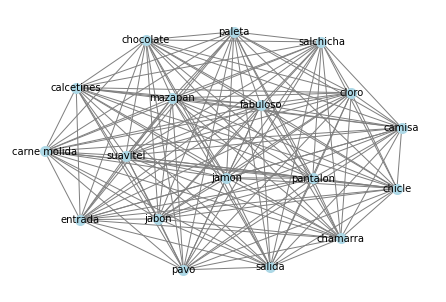

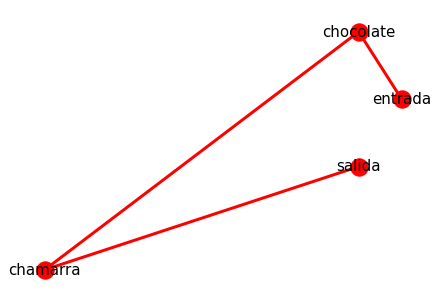

In [6]:
with open('/content/grapho (1).json') as grafo:
  data = json.load(grafo)
  for datos in data:
    Nombre_Nodos = datos.get('nombre_nodos')
    Nodos = datos.get('nodos')
    Aristas = datos.get('aristas')
    Peso = datos.get('peso')

#Llenar lista de EDGES
num_edges = len(Aristas)
num_vertices = len(Nodos)
vertex_inicio = Nodos[0]

edge_list = []
edge = []
numero = 0
cont = 0

for u,v in Aristas:
  Lista = []
  Lista.append(u)
  Lista.append(v)
  cont = 0
  for p in Peso:
    if numero == cont:
      Lista.append(p)
    cont += 1
  numero += 1
  edge.append(Lista)

for u,v,p in edge:
  edge_list.append(EdgeElement(u, v, p))


lista_compras = []
bell = BellEndFord(edge_list, Nodos, Aristas, Peso, Nombre_Nodos) #Instancia de la clase BellEndFord
#lista_compras = bell.menu()


print("Chocolate \nPaleta \n")
print("Chicle \nMazapan \n")
print("Carne molida \nJamón \n")
print("Salchicha \nPavo \n")
print("Jabón \nCloro \n")
print("Suavite \nFabuloso \n")
print("Pantalón \nCamisa \n")
print("Chamarra \nCalcetines \n")



#Esta parte es el algortimo que devuelve en orden la lista de compras ( lista: recorrido)

nodo_siguiente = 0 # empezando sería la entrada
recorrido = []
distancia_menor = 9999

recorrido.append(nodo_siguiente)

lista_productos = bell.menu() #La lista de compras se pasa como parametro
copy = lista_productos
lista_distancias = []


for i in range(len(lista_productos)):
  distancia_menor = 9999
  lista_distancias = bell.get_short_path(num_vertices, nodo_siguiente)
  for item in copy:
    if lista_distancias[item].distancia < distancia_menor:
      distancia_menor = lista_distancias[item].distancia
      nodo_siguiente = item
      
  copy.remove(nodo_siguiente) #1eleimina el producto que ya fue tomado en el 'carrito'
  recorrido.append(nodo_siguiente)


recorrido.append(17) #agrego por último la salida al recorrido

print(recorrido)
bell.plot_graph()
bell.plot_short_path(recorrido)

